In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
from kineticmodel import SRTM_Zhou2003, SRTM_Lammertsma1996

In [24]:
import sys, os
sys.path.insert(0,os.pardir)
from tests.generate_test_data import generate_fakeTAC_SRTM

In [25]:
import numpy as np
#np.random.seed(0)

import scipy as sp
import matplotlib.pyplot as plt
% matplotlib inline

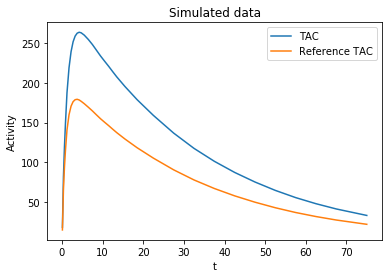

In [26]:
# generate noiseless fake data based on SRTM
BP = 0.5
R1 = 1.2
t, dt, TAC, refTAC = generate_fakeTAC_SRTM(BP, R1)

fig, ax = plt.subplots();
ax.plot(t, TAC, label='TAC');
ax.plot(t, refTAC, label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

In [41]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC, refTAC)

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([ 0.49424351]),
 'R1': array([ 1.37144307]),
 'akaike': array([ 200.49466281]),
 'err': array([ 0.70365295]),
 'fpe': array([ 724.99865245]),
 'k2': array([ 0.48671592]),
 'logl': array([-96.24733141]),
 'mse': array([ 19.07891191])}

In [42]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC, refTAC)

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.50008519]),
 'R1': array([ 1.21159295]),
 'R1_lrsc': array([ nan]),
 'k2': array([ 1.16059185]),
 'k2_lrsc': array([ nan]),
 'k2a': array([ 0.7736839]),
 'k2a_lrsc': array([ nan]),
 'noiseVar_eqDVR': array([ 0.01630222]),
 'noiseVar_eqR1': array([ 0.0097611])}

In [43]:
# Generate noisy simulations by adding normal noise -- I don't think this is a good way
pct_noise = np.array([0, 5, 10, 15, 20, 25, 30])

TAC_matrix = TAC + np.random.normal(0,np.outer(TAC,pct_noise/100).T)

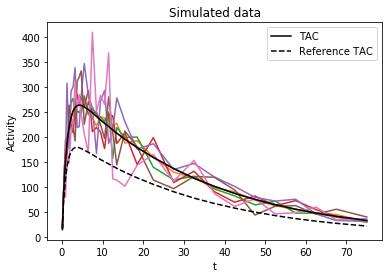

In [44]:
fig, ax = plt.subplots();
ax.plot(t, TAC_matrix.T, label='');
ax.plot(t, TAC, 'k-', label='TAC');
ax.plot(t, refTAC, 'k--', label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

Experiment using noisy TAC and noiseless reference TAC

In [45]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC_matrix, refTAC)

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([  0.49424363,   0.50077262,   0.44264478,   0.49542789,
          0.66539838,  19.99999951,  19.71063441]),
 'R1': array([ 1.37144324,  1.38156309,  1.49164725,  1.39122299,  1.5748948 ,
         1.43117845,  1.39959389]),
 'akaike': array([ 200.49481135,  255.5830789 ,  302.41980732,  316.99906595,
         353.19647059,  344.11955361,  381.06459361]),
 'err': array([  0.70365449,   1.58218809,   3.15015542,   3.90393538,
          6.64785756,   5.81715411,  10.01541319]),
 'fpe': array([    725.00182412,    3665.52681193,   14530.61973209,
          22316.46570277,   64711.81586901,   49549.7326205 ,
         146878.39479195]),
 'k2': array([  4.86713727e-01,   3.93132076e-01,   3.71378537e-02,
          2.66562156e-01,   1.68636584e-01,   5.44501452e-04,
          2.07734918e-04]),
 'logl': array([ -96.24740568, -123.79153945, -147.20990366, -154.49953298,
        -172.59823529, -168.05977681, -186.53229681]),
 'mse': array([   19.07899537,    96.46123189,   382.384729

In [46]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC_matrix, refTAC)

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.50008519,  0.50393026,  0.4635167 ,  0.48386505,  0.66059623,
         0.43211703,  0.39264578]),
 'R1': array([ 1.21159295,  1.47040062,  1.49047218,  1.4502066 ,  1.62691034,
         1.42756503,  1.39961641]),
 'R1_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2': array([ 1.16059185,  0.10147908,  0.04726814,  0.05032101,  0.03588842,
        -0.02335845,  0.00420192]),
 'k2_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2a': array([ 0.7736839 ,  0.06736575,  0.03262749,  0.03345326,  0.02148559,
        -0.01666397,  0.00287807]),
 'k2a_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'noiseVar_eqDVR': array([  1.63022203e-02,   6.56874068e+02,   3.77553962e+03,
          5.09319411e+03,   5.28083716e+03,   1.60150413e+04,
          1.48785613e+04]),
 'noiseVar_eqR1': array([  9.76110199e-03,   1.33269987e+02,   4.31447250e+02,
          1.00321927e+03,   1.41947455e+03,   1.49697271e+03,
          4.26126268e+03])}

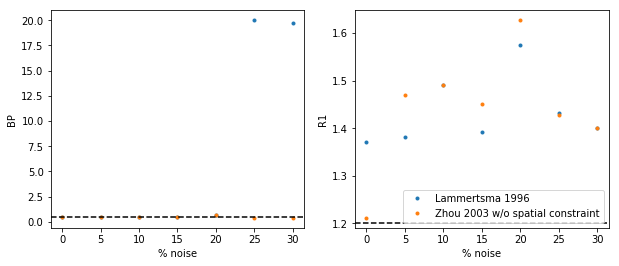

In [47]:
fig, axes = plt.subplots(1,2, figsize=(10,4));

axes[0].plot(pct_noise, mdl_lammertsma.results['BP'], '.', label='Lammertsma 1996');
axes[0].plot(pct_noise, mdl_zhou.results['BP'], '.', label='Zhou 2003 w/o spatial constraint');
axes[0].axhline(y=BP, color='k', linestyle='--');
axes[0].set_xlabel('% noise');
axes[0].set_ylabel('BP');
#axes[0].legend();

axes[1].plot(pct_noise, mdl_lammertsma.results['R1'], '.', label='Lammertsma 1996');
axes[1].plot(pct_noise, mdl_zhou.results['R1'], '.', label='Zhou 2003 w/o spatial constraint');
axes[1].axhline(y=R1, color='k', linestyle='--');
axes[1].set_xlabel('% noise');
axes[1].set_ylabel('R1');
axes[1].legend();